In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem

In [64]:
df = pd.read_csv('data/raw/PROTACXN_P35372_bioassay.csv')
df.columns

Index(['aid', 'aidtype', 'aidname', 'aiddesc', 'aidsrcid', 'aidsrcname',
       'aidextid', 'aidmdate', 'cids', 'sids', 'geneids', 'aidcategories',
       'protacxns', 'depcatg', 'pmids', 'rnai', 'ecs', 'repacxns', 'taxids',
       'cellids', 'targettaxid', 'annotation'],
      dtype='object')

In [65]:
df.aidname

0       Displacement of [3H]-Diprenorphine from recomb...
1       Agonist activity at MOP (unknown origin) expre...
2       Potency index, ratio of EC50 for N/OFQ(1-13)-N...
3       Agonist activity at MOP (unknown origin) expre...
4       Potency index, ratio of EC50 for N/OFQ(1-13)-N...
                              ...                        
1939    Late-stage results from the probe development ...
1940    Late-stage results from the probe development ...
1941    Late stage Counterscreen for the probe develop...
1942    Late-stage counterscreen panel assay for AVPR1...
1943                 Human mu receptor (Opioid receptors)
Name: aidname, Length: 1944, dtype: object

In [66]:
def filter(x):
    x = x.lower()
    if "partial agonist" in x:
        return 1
    if "partial agonists" in x:
        return 1
    if "partial agonism" in x:
        return 1
    else:
        return 0
    
df['partial_agonist_desc']= df.aiddesc.apply(filter)

In [67]:
def filter(x):
    x = x.lower()
    if "partial agonist" in x:
        return 1
    if "partial agonists" in x:
        return 1
    if "partial agonism" in x:
        return 1
    else:
        return 0
    
df['partial_agonist_aidname']= df.aidname.apply(filter)

In [79]:
# df.partial_agonist_desc.value_counts()
df_test = df.loc[(df['partial_agonist_desc'] == 1) | (df['partial_agonist_aidname'] == 1)]
# df_test
df_test.to_csv('partial_agonist2.csv')

In [13]:
df['cids']

0                                               134263768
1            461776|5485199|162650253|162652235|162669353
2            461776|5485199|162650253|162652235|162669353
3            461776|5485199|162650253|162652235|162669353
4             461776|5485199|14840413|162650253|162669353
                              ...                        
1939    763998|772564|776307|792477|2837871|6467537|10...
1940    60156205|60156206|60156210|60156211|60156212|6...
1941    1220|1935|2685|3153|5374|36811|47811|199200|20...
1942                                             71768335
1943    3345|3903|3955|4058|4095|5523|13493|22267|4169...
Name: cids, Length: 1944, dtype: object

In [18]:
df_cid = pd.DataFrame(df['cids'].str.split('|', expand=True))
df_cid

,0,1,2,3,4,5,6,7,8,9,...,1852,1853,1854,1855,1856,1857,1858,1859,1860,1861
0,134263768,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,461776,5485199,162650253,162652235,162669353,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,461776,5485199,162650253,162652235,162669353,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,461776,5485199,162650253,162652235,162669353,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,461776,5485199,14840413,162650253,162669353,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,763998,772564,776307,792477,2837871,6467537,10407491,16187337,16189614,16191055,...,None,None,None,None,None,None,None,None,None,None
1940,60156205,60156206,60156210,60156211,60156212,60156214,60156217,60156221,60156232,60156234,...,None,None,None,None,None,None,None,None,None,None
1941,1220,1935,2685,3153,5374,36811,47811,199200,202478,743199,...,None,None,None,None,None,None,None,None,None,None
1942,71768335,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [21]:
X = df_cid.isna().sum().index
y = df_cid.isna().sum().values
# sns.barplot(X, y)
f, ax = plt.subplots(figsize=(9, 6))

plt.show()
print(X)
print(y)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861],
           dtype='int64', length=1862)
[   8  704  906 ... 1942 1942 1942]


<AxesSubplot:>

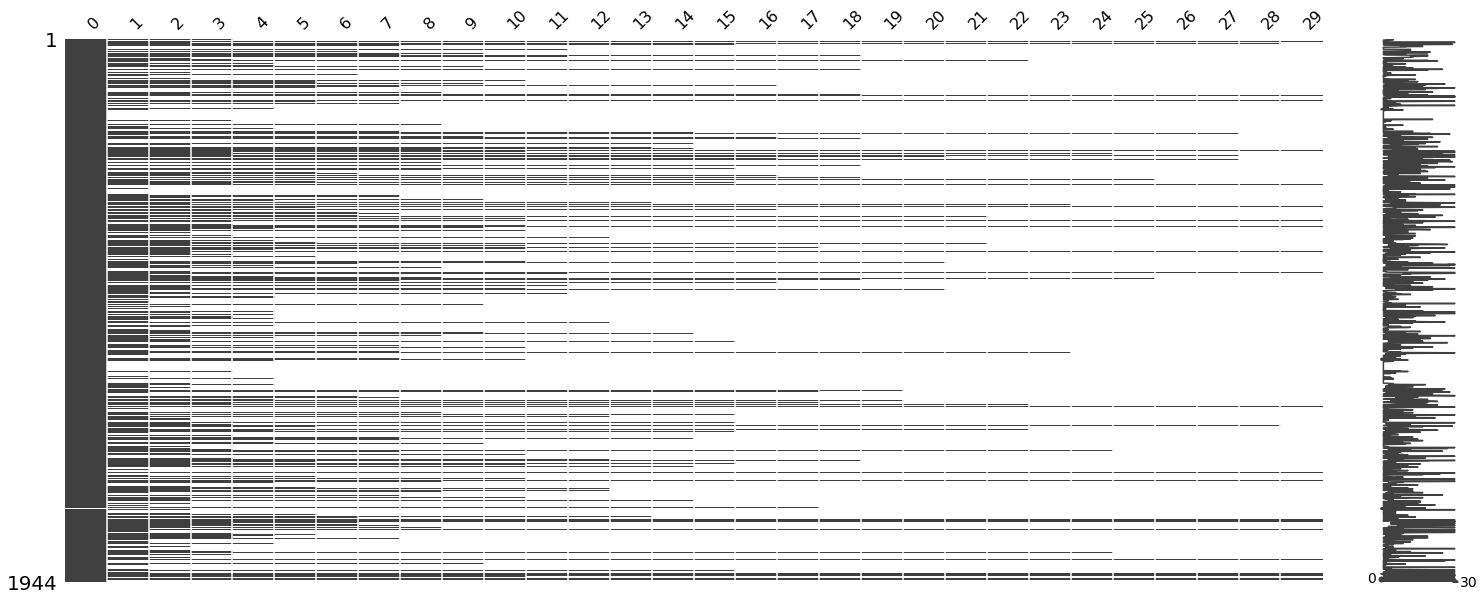

In [25]:
import missingno as msno
msno.matrix(df_cid.iloc[:, :30])

In [50]:
first_cid = df_cid[0]
first_cid = first_cid[first_cid.notnull()]
first_cid = pd.DataFrame(first_cid)
first_cid.columns

Int64Index([0], dtype='int64')

In [56]:
import sys 
np.set_printoptions(threshold=sys.maxsize)

first_cid[0].values

array(['134263768', '461776', '461776', '461776', '461776', '461776',
       '162654767', '162641730', '162641730', '162641730', '162672290',
       '162659961', '12038831', '12038831', '44247568', '44247568',
       '20522011', '20522011', '5284603', '5284603', '5284603', '854019',
       '128563', '128563', '128563', '128563', '128563', '128563',
       '128563', '128563', '121596705', '121596705', '121596705',
       '121596705', '121596705', '155804579', '644019', '644019',
       '118731120', '162643877', '118731120', '118731120', '118731120',
       '118731120', '135150944', '135150944', '162674347', '5462471',
       '5462471', '10033203', '10033203', '157010706', '155977949',
       '155977949', '3345', '3345', '132256735', '9815616', '5360515',
       '3086114', '132941097', '132941097', '128563', '5288826',
       '5288826', '5288826', '5288826', '128563', '441278', '162665987',
       '115107', '57587922', '5288826', '5360515', '5360515', '5360515',
       '461776', '1626489

In [51]:
import requests
from requests.sessions import Session
def smiles_conv(x):
    with requests.Session() as session:
        url = "https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{}/property/CanonicalSMILES/JSON".format(x)
        with session.get(url) as response:  
            doc = response.json()
            
    return doc["PropertyTable"]["Properties"][0]["CanonicalSMILES"]
first_cid['smiles'] = first_cid[0].apply(smiles_conv)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

In [ ]:
first_cid